## Forecasting Algorithm : ARIMA

## Model used: AutoARIMA

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
 
from datetime import *
#from datetime import datetime
from pmdarima.arima import auto_arima
from math import sqrt
from sklearn.metrics import mean_squared_error


## Loading Dataset

In [2]:
data = pd.read_csv('challenge_data_20.csv')
data.head()

,time,operating_hours,fuel_consumption(liter),engine_id
0,2017-12-19,3726,3404.8,8331744407
1,2017-12-20,3746,3865.6,8331744407
2,2017-12-21,3748,3891.2,8331744407
3,2017-12-22,3768,3840.0,8331744407
4,2017-12-23,3776,3891.2,8331744407


## Total number of engines

In [3]:
engines= data['engine_id'].unique()
engines

array([8331744407, 7133245688, 3643747759, 3308150982, 8711753003,
       2582458400, 8481959000, 7940559597, 2159359786, 5687959787,
       4569859790, 3413759796, 5246759857, 2654264148, 3850565523,
       5452766296, 5452799100, 5452799200, 5452799300, 5452799400],
      dtype=int64)

In [4]:
len(engines)

20

## Engine 1: Operating Hours forecast

In [5]:
data1= data[data['engine_id']==engines[0]]
data1= data1[['time','operating_hours']]
len(data1)

101

## Train Test Split

In [6]:
#divide into train and validation set
train = data1[:int(0.8*(len(data1)))]
valid = data1[int(0.8*(len(data1))):]

#preprocessing (since arima takes univariate series as input)
train.drop('time',axis=1,inplace=True)
valid.drop('time',axis=1,inplace=True)

C:\Users\sid33.SINHA\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


##  Operating Hours Forecasting Model (ARIMA)

Performing stepwise search to minimize aic
Fit ARIMA: (2, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=787.083, BIC=801.300, Time=0.598 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=779.112, BIC=783.850, Time=0.007 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=781.106, BIC=788.215, Time=0.021 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=781.106, BIC=788.214, Time=0.064 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=794.133, BIC=796.502, Time=0.006 seconds
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=783.107, BIC=792.585, Time=0.066 seconds
Total fit time: 0.807 seconds


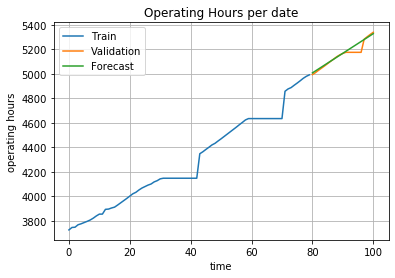

In [7]:
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Forecast'])

#plot the predictions for validation set    
plt.plot(train, label='Train')
plt.plot(valid, label='Validation')
plt.plot(forecast, label='Forecast')

#labels=list(data1.columns.difference(['time']))
plt.legend()
plt.xlabel('time')
plt.ylabel('operating hours')
plt.title('Operating Hours per date')
plt.grid()
plt.show()

## Actual vs Forecast Operating Hours

In [8]:
pd.merge(valid,forecast,right_index=True, left_index=True)

,operating_hours,Forecast
80,4994,5008.025316
81,5010,5024.050633
82,5029,5040.075949
83,5047,5056.101266
84,5065,5072.126582
85,5084,5088.151899
86,5103,5104.177215
87,5121,5120.202532
88,5140,5136.227848
89,5155,5152.253165


## MSE (Mean Squared Error)

In [9]:
#calculate mse
mse = mean_squared_error(valid,forecast)
mse

928.2933366905312

## Engine 1: Fuel Consumption Forecast

## Train Test Split

In [10]:
data1_= data[data['engine_id']==engines[0]]
data1_= data1_[['time','fuel_consumption(liter)']]
#divide into train and validation set
train = data1_[:int(0.8*(len(data1_)))]
valid = data1_[int(0.8*(len(data1_))):]

#preprocessing (since arima takes univariate series as input)
train.drop('time',axis=1,inplace=True)
valid.drop('time',axis=1,inplace=True)

C:\Users\sid33.SINHA\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Fuel Consumption Forecasting Model (ARIMA)

Performing stepwise search to minimize aic
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=997.773, BIC=1012.065, Time=0.097 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=989.197, BIC=993.961, Time=0.011 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=991.191, BIC=998.338, Time=0.107 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=991.191, BIC=998.337, Time=0.061 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=1550.189, BIC=1552.571, Time=0.005 seconds
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=993.190, BIC=1002.718, Time=0.127 seconds
Total fit time: 0.414 seconds


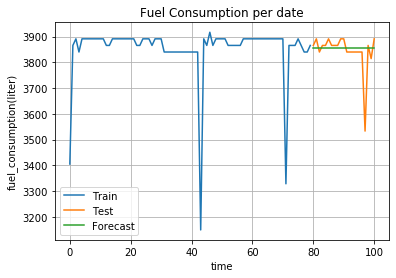

In [11]:
#building the model
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Forecast'])

#plot the predictions for validation set    
plt.plot(train, label='Train')
plt.plot(valid, label='Test')
plt.plot(forecast, label='Forecast')

#labels=list(data1.columns.difference(['time']))
plt.legend()
plt.xlabel('time')
plt.ylabel('fuel_consumption(liter)')
plt.title('Fuel Consumption per date')
plt.grid()
plt.show()

## Actual vs Forecast Fuel Consumption

In [12]:
pd.merge(valid,forecast,right_index=True, left_index=True)

,fuel_consumption(liter),Forecast
80,3865.6,3853.76
81,3891.2,3853.76
82,3840.0,3853.76
83,3865.6,3853.76
84,3865.6,3853.76
85,3891.2,3853.76
86,3865.6,3853.76
87,3865.6,3853.76
88,3865.6,3853.76
89,3891.2,3853.76


## Calculate MSE

In [13]:
mse = mean_squared_error(valid,forecast)
mse

5422.855314285693

## Engine 2: Operating Hours forecast

In [14]:
data1= data[data['engine_id']==engines[1]]
data1= data1[['time','operating_hours']]
len(data1)

100

## Train Test Split

In [15]:
#divide into train and validation set
train = data1[:int(0.8*(len(data1)))]
valid = data1[int(0.8*(len(data1))):]

#preprocessing (since arima takes univariate series as input)
train.drop('time',axis=1,inplace=True)
valid.drop('time',axis=1,inplace=True)

C:\Users\sid33.SINHA\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


##  Operating Hours Forecasting Model (ARIMA)

Performing stepwise search to minimize aic
Fit ARIMA: (2, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=536.382, BIC=550.523, Time=0.334 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=543.232, BIC=547.945, Time=0.006 seconds
Fit ARIMA: (1, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=542.401, BIC=549.471, Time=0.019 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=540.848, BIC=547.918, Time=0.039 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=False); AIC=541.233, BIC=543.589, Time=0.006 seconds
Fit ARIMA: (1, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=534.668, BIC=546.451, Time=0.269 seconds
Near non-invertible roots for order (1, 2, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (2, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=534.655, BIC=546.438, Time=0.219 seconds
Near non-invertible roots for order (2, 2, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the bo

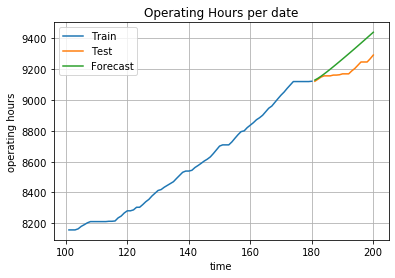

In [16]:
#building the model
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Forecast'])

#plot the predictions for validation set    
plt.plot(train, label='Train')
plt.plot(valid, label='Test')
plt.plot(forecast, label='Forecast')

#labels=list(data1.columns.difference(['time']))
plt.legend()
plt.xlabel('time')
plt.ylabel('operating hours')
plt.title('Operating Hours per date')
plt.grid()
plt.show()

## Actual vs Forecast Operating Hours

In [17]:
pd.merge(valid,forecast,right_index=True, left_index=True)

,operating_hours,Forecast
181,9122,9129.806008
182,9135,9141.062818
183,9149,9154.387697
184,9157,9168.968845
185,9157,9184.329658
186,9157,9200.190320
187,9162,9216.386556
188,9162,9232.821917
189,9164,9249.439781
190,9170,9266.206903


## Calculate MSE

In [18]:
#calculate mse
mse = mean_squared_error(valid,forecast)
mse

10558.49817738669

## Engine 2: Fuel Consumption Forecast

## Train Test Split

C:\Users\sid33.SINHA\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


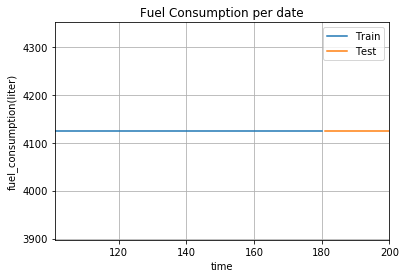

In [19]:
data1_= data[data['engine_id']==engines[1]]
data1_= data1_[['time','fuel_consumption(liter)']]
#divide into train and validation set
train = data1_[:int(0.8*(len(data1_)))]
valid = data1_[int(0.8*(len(data1_))):]

#preprocessing (since arima takes univariate series as input)
train.drop('time',axis=1,inplace=True)
valid.drop('time',axis=1,inplace=True)

#plotting the data
train['fuel_consumption(liter)'].plot(label='Train')
valid['fuel_consumption(liter)'].plot(label='Test')
plt.legend()
plt.xlabel('time')
plt.ylabel('fuel_consumption(liter)')
plt.title('Fuel Consumption per date')
plt.grid()
plt.show()

### Fuel Consumption rate is constant for all 100 days. It seems ambiguous data, thus forecast will be same constant.

In [20]:
data1_['fuel_consumption(liter)'].unique()

array([4124.3])

## Engine 3: Operating Hours forecast

In [21]:
data1= data[data['engine_id']==engines[2]]
data1= data1[['time','operating_hours']]
len(data1)

100

## Train Test Split

In [22]:
#divide into train and validation set
train = data1[:int(0.8*(len(data1)))]
valid = data1[int(0.8*(len(data1))):]

#preprocessing (since arima takes univariate series as input)
train.drop('time',axis=1,inplace=True)
valid.drop('time',axis=1,inplace=True)

C:\Users\sid33.SINHA\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


##  Operating Hours Forecasting Model (ARIMA)

Performing stepwise search to minimize aic
Fit ARIMA: (2, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=516.413, BIC=530.553, Time=0.218 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=528.783, BIC=533.496, Time=0.009 seconds
Fit ARIMA: (1, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=517.877, BIC=524.947, Time=0.027 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=513.718, BIC=520.788, Time=0.035 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=False); AIC=526.814, BIC=529.171, Time=0.007 seconds
Fit ARIMA: (1, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=515.705, BIC=525.132, Time=0.052 seconds
Fit ARIMA: (0, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=515.705, BIC=525.132, Time=0.058 seconds
Fit ARIMA: (1, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=517.691, BIC=529.474, Time=0.207 seconds
Total fit time: 0.621 seconds


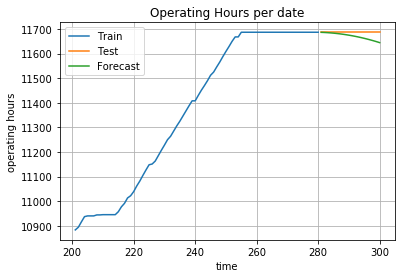

In [23]:
#building the model
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Forecast'])

#plot the predictions for validation set    
plt.plot(train, label='Train')
plt.plot(valid, label='Test')
plt.plot(forecast, label='Forecast')

#labels=list(data1.columns.difference(['time']))
plt.legend()
plt.xlabel('time')
plt.ylabel('operating hours')
plt.title('Operating Hours per date')
plt.grid()
plt.show()

## Actual vs Forecast Operating Hours

In [24]:
pd.merge(valid,forecast,right_index=True, left_index=True)

,operating_hours,Forecast
281,11687,11686.631635
282,11687,11686.079735
283,11687,11685.344298
284,11687,11684.425325
285,11687,11683.322815
286,11687,11682.036770
287,11687,11680.567188
288,11687,11678.914070
289,11687,11677.077416
290,11687,11675.057226


## Calculate MSE

In [25]:
#calculate mse
mse = mean_squared_error(valid,forecast)
mse

427.20880439732184

## Engine 3: Fuel Consumption Forecast

## Train Test Split

In [26]:
data1_= data[data['engine_id']==engines[2]]
data1_= data1_[['time','fuel_consumption(liter)']]
#divide into train and validation set
train = data1_[:int(0.8*(len(data1_)))]
valid = data1_[int(0.8*(len(data1_))):]

#preprocessing (since arima takes univariate series as input)
train.drop('time',axis=1,inplace=True)
valid.drop('time',axis=1,inplace=True)

C:\Users\sid33.SINHA\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Fuel Consumption Forecasting Model (ARIMA)

Performing stepwise search to minimize aic
Fit ARIMA: (2, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=667.360, BIC=681.577, Time=0.161 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=716.110, BIC=720.849, Time=0.007 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=680.154, BIC=687.263, Time=0.021 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=666.283, BIC=673.391, Time=0.056 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=714.110, BIC=716.480, Time=0.006 seconds
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=664.895, BIC=674.372, Time=0.043 seconds
Fit ARIMA: (2, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=665.962, BIC=677.810, Time=0.098 seconds
Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=666.511, BIC=678.358, Time=0.108 seconds
Fit ARIMA: (0, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=664.612, BIC=674.090, Time=0.067 seconds
Fit ARIMA: (0, 1, 3)x(0, 0, 0, 0) (constant=True); AIC=666.290, BIC=678.138, Time=0.137 seco

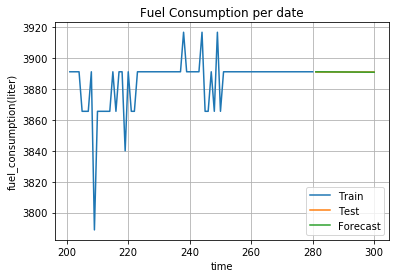

In [27]:
#building model
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Forecast'])

#plot the predictions for validation set    
plt.plot(train, label='Train')
plt.plot(valid, label='Test')
plt.plot(forecast, label='Forecast')

#labels=list(data1.columns.difference(['time']))
plt.legend()
plt.xlabel('time')
plt.ylabel('fuel_consumption(liter)')
plt.title('Fuel Consumption per date')
plt.grid()
plt.show()

## Actual vs Forecast Fuel Consumption

In [28]:
pd.merge(valid,forecast,right_index=True, left_index=True)

,fuel_consumption(liter),Forecast
281,3891.2,3891.167557
282,3891.2,3891.165717
283,3891.2,3891.153385
284,3891.2,3891.141054
285,3891.2,3891.128722
286,3891.2,3891.116390
287,3891.2,3891.104059
288,3891.2,3891.091727
289,3891.2,3891.079395
290,3891.2,3891.067064


## Calculate MSE

In [29]:
#calculate mse
mse = mean_squared_error(valid,forecast)
mse

0.024434222943805733

## Engine 4: Operating Hours forecast

In [30]:
data1= data[data['engine_id']==engines[3]]
data1= data1[['time','operating_hours']]
len(data1)

101

## Train Test Split

In [31]:
#divide into train and validation set
train = data1[:int(0.8*(len(data1)))]
valid = data1[int(0.8*(len(data1))):]

#preprocessing (since arima takes univariate series as input)
train.drop('time',axis=1,inplace=True)
valid.drop('time',axis=1,inplace=True)

C:\Users\sid33.SINHA\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


##  Operating Hours Forecasting Model (ARIMA)

Performing stepwise search to minimize aic
Fit ARIMA: (2, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=346.233, BIC=360.373, Time=0.307 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=376.296, BIC=381.009, Time=0.007 seconds
Fit ARIMA: (1, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=378.224, BIC=385.294, Time=0.019 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=378.168, BIC=385.239, Time=0.034 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=False); AIC=374.562, BIC=376.919, Time=0.008 seconds
Fit ARIMA: (1, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=365.803, BIC=377.587, Time=0.105 seconds
Fit ARIMA: (2, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=361.334, BIC=373.118, Time=0.111 seconds
Fit ARIMA: (3, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=357.181, BIC=373.678, Time=0.137 seconds
Fit ARIMA: (2, 2, 3)x(0, 0, 0, 0) (constant=True); AIC=355.952, BIC=372.449, Time=0.378 seconds
Fit ARIMA: (1, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=379.971, BIC=389.398, Time=0.074 seco

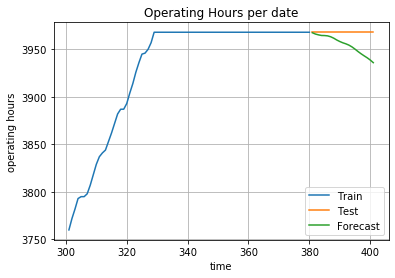

In [32]:
#building the model
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Forecast'])

#plot the predictions for validation set    
plt.plot(train, label='Train')
plt.plot(valid, label='Test')
plt.plot(forecast, label='Forecast')

#labels=list(data1.columns.difference(['time']))
plt.legend()
plt.xlabel('time')
plt.ylabel('operating hours')
plt.title('Operating Hours per date')
plt.grid()
plt.show()

## Actual vs Forecast Operating Hours

In [33]:
pd.merge(valid,forecast,right_index=True, left_index=True)

,operating_hours,Forecast
381,3968,3967.451867
382,3968,3966.093700
383,3968,3965.232959
384,3968,3964.597208
385,3968,3964.509994
386,3968,3964.183070
387,3968,3963.251778
388,3968,3961.755426
389,3968,3959.841670
390,3968,3958.242589


## Calculate MSE

In [34]:
#calculate mse
mse = mean_squared_error(valid,forecast)
mse

258.4950437397009

## Engine 4: Fuel Consumption Forecast

## Train Test Split

In [35]:
data1_= data[data['engine_id']==engines[3]]
data1_= data1_[['time','fuel_consumption(liter)']]
#divide into train and validation set
train = data1_[:int(0.8*(len(data1_)))]
valid = data1_[int(0.8*(len(data1_))):]

#preprocessing (since arima takes univariate series as input)
train.drop('time',axis=1,inplace=True)
valid.drop('time',axis=1,inplace=True)

C:\Users\sid33.SINHA\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Fuel Consumption Forecasting Model (ARIMA)

Performing stepwise search to minimize aic
Fit ARIMA: (2, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=691.589, BIC=705.729, Time=0.227 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=722.799, BIC=727.512, Time=0.007 seconds
Fit ARIMA: (1, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=724.553, BIC=731.623, Time=0.026 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=724.069, BIC=731.139, Time=0.061 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=False); AIC=721.043, BIC=723.400, Time=0.006 seconds
Fit ARIMA: (1, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=706.891, BIC=718.674, Time=0.141 seconds
Fit ARIMA: (2, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=701.907, BIC=713.690, Time=0.102 seconds
Fit ARIMA: (3, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=704.296, BIC=720.793, Time=0.261 seconds
Fit ARIMA: (2, 2, 3)x(0, 0, 0, 0) (constant=True); AIC=691.084, BIC=707.581, Time=0.352 seconds
Fit ARIMA: (1, 2, 3)x(0, 0, 0, 0) (constant=True); AIC=704.084, BIC=718.224, Time=0.177 seco

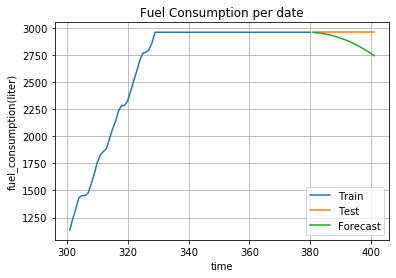

In [36]:
#building the model
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Forecast'])

#plot the predictions for validation set    
plt.plot(train, label='Train')
plt.plot(valid, label='Test')
plt.plot(forecast, label='Forecast')

#labels=list(data1.columns.difference(['time']))
plt.legend()
plt.xlabel('time')
plt.ylabel('fuel_consumption(liter)')
plt.title('Fuel Consumption per date')
plt.grid()
plt.show()

## Actual vs Forecast Fuel Consumption

In [37]:
pd.merge(valid,forecast,right_index=True, left_index=True)

,fuel_consumption(liter),Forecast
381,2961.5,2959.422967
382,2961.5,2956.554226
383,2961.5,2953.352325
384,2961.5,2949.811551
385,2961.5,2945.482361
386,2961.5,2939.849619
387,2961.5,2932.750937
388,2961.5,2924.495833
389,2961.5,2915.599635
390,2961.5,2906.360217


## Calculate MSE

In [38]:
#calculate mse
mse = mean_squared_error(valid,forecast)
mse

11027.352039436277

## Engine 5: Operating Hours forecast

In [39]:
data1= data[data['engine_id']==engines[4]]
data1= data1[['time','operating_hours']]
len(data1)

100

## Train Test Split

In [40]:
#divide into train and validation set
train = data1[:int(0.8*(len(data1)))]
valid = data1[int(0.8*(len(data1))):]

#preprocessing (since arima takes univariate series as input)
train.drop('time',axis=1,inplace=True)
valid.drop('time',axis=1,inplace=True)

C:\Users\sid33.SINHA\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


##  Operating Hours Forecasting Model (ARIMA)

Performing stepwise search to minimize aic
Fit ARIMA: (2, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=179.969, BIC=194.109, Time=0.156 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=221.248, BIC=225.962, Time=0.017 seconds
Fit ARIMA: (1, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=204.987, BIC=212.057, Time=0.018 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=178.914, BIC=185.984, Time=0.049 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=False); AIC=219.248, BIC=221.605, Time=0.010 seconds
Fit ARIMA: (1, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=180.770, BIC=190.197, Time=0.070 seconds
Fit ARIMA: (0, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=180.701, BIC=190.128, Time=0.076 seconds
Fit ARIMA: (1, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=180.169, BIC=191.953, Time=0.165 seconds
Total fit time: 0.568 seconds


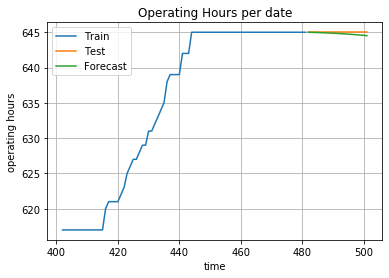

In [41]:
#building the model
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Forecast'])

#plot the predictions for validation set    
plt.plot(train, label='Train')
plt.plot(valid, label='Test')
plt.plot(forecast, label='Forecast')

#labels=list(data1.columns.difference(['time']))
plt.legend()
plt.xlabel('time')
plt.ylabel('operating hours')
plt.title('Operating Hours per date')
plt.grid()
plt.show()

## Actual vs Forecast Operating Hours

In [42]:
pd.merge(valid,forecast,right_index=True, left_index=True)

,operating_hours,Forecast
482,645,644.991455
483,645,644.981253
484,645,644.969394
485,645,644.955879
486,645,644.940707
487,645,644.923878
488,645,644.905392
489,645,644.885250
490,645,644.863451
491,645,644.839995


## Calculate MSE

In [43]:
#calculate mse
mse = mean_squared_error(valid,forecast)
mse

0.06152974373603345

## Engine 5: Fuel Consumption Forecast

## Train Test Split

In [44]:
data1_= data[data['engine_id']==engines[4]]
data1_= data1_[['time','fuel_consumption(liter)']]
#divide into train and validation set
train = data1_[:int(0.8*(len(data1_)))]
valid = data1_[int(0.8*(len(data1_))):]

#preprocessing (since arima takes univariate series as input)
train.drop('time',axis=1,inplace=True)
valid.drop('time',axis=1,inplace=True)

C:\Users\sid33.SINHA\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Fuel Consumption Forecasting Model (ARIMA)

Performing stepwise search to minimize aic
Fit ARIMA: (2, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=531.260, BIC=545.400, Time=0.341 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=561.240, BIC=565.954, Time=0.007 seconds
Fit ARIMA: (1, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=547.150, BIC=554.220, Time=0.023 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=527.529, BIC=534.600, Time=0.041 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=False); AIC=559.240, BIC=561.597, Time=0.007 seconds
Fit ARIMA: (1, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=529.257, BIC=538.684, Time=0.062 seconds
Fit ARIMA: (0, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=529.224, BIC=538.651, Time=0.051 seconds
Fit ARIMA: (1, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=529.293, BIC=541.076, Time=0.198 seconds
Near non-invertible roots for order (1, 2, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Total fit time: 0.737 seconds


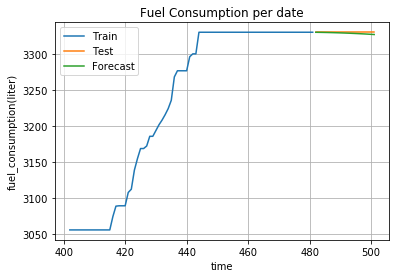

In [45]:
#building the model
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Forecast'])

#plot the predictions for validation set    
plt.plot(train, label='Train')
plt.plot(valid, label='Test')
plt.plot(forecast, label='Forecast')

#labels=list(data1.columns.difference(['time']))
plt.legend()
plt.xlabel('time')
plt.ylabel('fuel_consumption(liter)')
plt.title('Fuel Consumption per date')
plt.grid()
plt.show()

## Actual vs Forecast Fuel Consumption

In [46]:
pd.merge(valid,forecast,right_index=True, left_index=True)

,fuel_consumption(liter),Forecast
482,3330.5,3330.446187
483,3330.5,3330.381417
484,3330.5,3330.305691
485,3330.5,3330.219009
486,3330.5,3330.121370
487,3330.5,3330.012775
488,3330.5,3329.893223
489,3330.5,3329.762715
490,3330.5,3329.621251
491,3330.5,3329.468831


## Calculate MSE

In [47]:
#calculate mse
mse = mean_squared_error(valid,forecast)
mse

2.5873518669202253

## Engine 6: Operating Hours forecast

In [48]:
data1= data[data['engine_id']==engines[5]]
data1= data1[['time','operating_hours']]
len(data1)

100

## Train Test Split

In [49]:
#divide into train and validation set
train = data1[:int(0.8*(len(data1)))]
valid = data1[int(0.8*(len(data1))):]

#preprocessing (since arima takes univariate series as input)
train.drop('time',axis=1,inplace=True)
valid.drop('time',axis=1,inplace=True)

C:\Users\sid33.SINHA\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


##  Operating Hours Forecasting Model (ARIMA)

Performing stepwise search to minimize aic
Fit ARIMA: (2, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=444.577, BIC=458.717, Time=0.228 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=450.986, BIC=455.700, Time=0.008 seconds
Fit ARIMA: (1, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=451.939, BIC=459.010, Time=0.021 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=450.749, BIC=457.819, Time=0.031 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=False); AIC=449.191, BIC=451.548, Time=0.007 seconds
Fit ARIMA: (1, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=445.789, BIC=457.572, Time=0.087 seconds
Fit ARIMA: (2, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=448.384, BIC=460.167, Time=0.115 seconds
Fit ARIMA: (3, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=446.568, BIC=463.065, Time=0.377 seconds
Near non-invertible roots for order (3, 2, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (2, 2, 3)x(0, 0, 0,

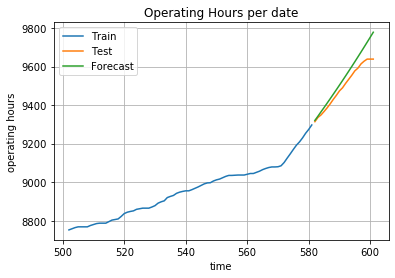

In [50]:
#building the model
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Forecast'])

#plot the predictions for validation set    
plt.plot(train, label='Train')
plt.plot(valid, label='Test')
plt.plot(forecast, label='Forecast')

#labels=list(data1.columns.difference(['time']))
plt.legend()
plt.xlabel('time')
plt.ylabel('operating hours')
plt.title('Operating Hours per date')
plt.grid()
plt.show()

## Actual vs Forecast Operating Hours

In [51]:
pd.merge(valid,forecast,right_index=True, left_index=True)

,operating_hours,Forecast
582,9314,9320.445809
583,9336,9342.497219
584,9349,9365.337435
585,9367,9387.690094
586,9386,9410.669294
587,9407,9433.511642
588,9430,9456.819799
589,9451,9480.156577
590,9474,9503.855362
591,9490,9527.669359


## Calculate MSE

In [52]:
#calculate mse
mse = mean_squared_error(valid,forecast)
mse

3302.6035893461826

## Engine 6: Fuel Consumption Forecast

## Train Test Split

In [53]:
data1_= data[data['engine_id']==engines[5]]
data1_= data1_[['time','fuel_consumption(liter)']]
#divide into train and validation set
train = data1_[:int(0.8*(len(data1_)))]
valid = data1_[int(0.8*(len(data1_))):]

#preprocessing (since arima takes univariate series as input)
train.drop('time',axis=1,inplace=True)
valid.drop('time',axis=1,inplace=True)

C:\Users\sid33.SINHA\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Fuel Consumption Forecasting Model (ARIMA)

Performing stepwise search to minimize aic
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=1227.499, BIC=1241.792, Time=0.243 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1245.525, BIC=1250.289, Time=0.007 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1226.179, BIC=1233.325, Time=0.013 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=1231.967, BIC=1239.113, Time=0.050 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=1570.584, BIC=1572.966, Time=0.005 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1226.021, BIC=1235.549, Time=0.033 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1226.343, BIC=1238.253, Time=0.051 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=1227.643, BIC=1239.554, Time=0.060 seconds
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=1226.191, BIC=1235.719, Time=0.038 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=1227.864, BIC=1242.

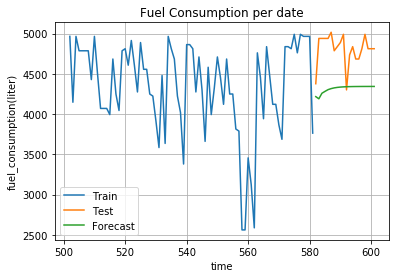

In [54]:
#building the model
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Forecast'])

#plot the predictions for validation set    
plt.plot(train, label='Train')
plt.plot(valid, label='Test')
plt.plot(forecast, label='Forecast')

#labels=list(data1.columns.difference(['time']))
plt.legend()
plt.xlabel('time')
plt.ylabel('fuel_consumption(liter)')
plt.title('Fuel Consumption per date')
plt.grid()
plt.show()

## Actual vs Forecast Fuel Consumption

In [55]:
pd.merge(valid,forecast,right_index=True, left_index=True)

,fuel_consumption(liter),Forecast
582,4377.6,4217.071913
583,4940.8,4190.307208
584,4940.8,4259.147167
585,4940.8,4282.442035
586,4940.8,4304.007790
587,5017.6,4316.870125
588,4787.2,4325.889180
589,4838.4,4331.816430
590,4889.6,4335.811197
591,4992.0,4338.476960


## Calculate MSE

In [56]:
#calculate mse
mse = mean_squared_error(valid,forecast)
mse

276242.21310942597

## Engine 7: Operating Hours forecast

In [57]:
data1= data[data['engine_id']==engines[6]]
data1= data1[['time','operating_hours']]
len(data1)

100

## Train Test Split

In [58]:
#divide into train and validation set
train = data1[:int(0.8*(len(data1)))]
valid = data1[int(0.8*(len(data1))):]

#preprocessing (since arima takes univariate series as input)
train.drop('time',axis=1,inplace=True)
valid.drop('time',axis=1,inplace=True)

C:\Users\sid33.SINHA\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


##  Operating Hours Forecasting Model (ARIMA)

Performing stepwise search to minimize aic
Fit ARIMA: (2, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=391.550, BIC=405.767, Time=0.192 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=418.038, BIC=422.777, Time=0.008 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=401.078, BIC=408.186, Time=0.022 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=403.149, BIC=410.257, Time=0.030 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=464.879, BIC=467.248, Time=0.008 seconds
Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=403.908, BIC=415.755, Time=0.071 seconds
Fit ARIMA: (2, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=403.799, BIC=415.646, Time=0.137 seconds
Fit ARIMA: (3, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=391.628, BIC=408.214, Time=0.416 seconds
Near non-invertible roots for order (3, 1, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.991)
Fit ARIMA: (2, 1, 3)x(0, 0, 0,

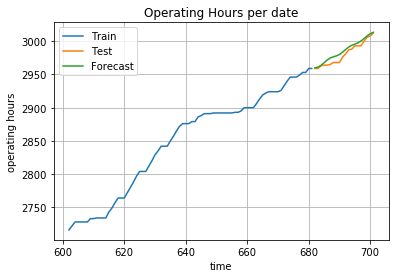

In [59]:
#building the model
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Forecast'])

#plot the predictions for validation set    
plt.plot(train, label='Train')
plt.plot(valid, label='Test')
plt.plot(forecast, label='Forecast')

#labels=list(data1.columns.difference(['time']))
plt.legend()
plt.xlabel('time')
plt.ylabel('operating hours')
plt.title('Operating Hours per date')
plt.grid()
plt.show()

## Actual vs Forecast Operating Hours

In [60]:
pd.merge(valid,forecast,right_index=True, left_index=True)

,operating_hours,Forecast
682,2959,2959.889275
683,2959,2961.074611
684,2963,2963.663069
685,2964,2967.574132
686,2964,2971.667543
687,2965,2974.745541
688,2968,2976.548224
689,2968,2977.914934
690,2968,2980.023323
691,2976,2983.389340


## Calculate MSE

In [61]:
#calculate mse
mse = mean_squared_error(valid,forecast)
mse

37.409111888331125

## Engine 7: Fuel Consumption Forecast

## Train Test Split

In [62]:
data1_= data[data['engine_id']==engines[6]]
data1_= data1_[['time','fuel_consumption(liter)']]
#divide into train and validation set
train = data1_[:int(0.8*(len(data1_)))]
valid = data1_[int(0.8*(len(data1_))):]

#preprocessing (since arima takes univariate series as input)
train.drop('time',axis=1,inplace=True)
valid.drop('time',axis=1,inplace=True)

C:\Users\sid33.SINHA\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Fuel Consumption Forecasting Model (ARIMA)

Performing stepwise search to minimize aic
Fit ARIMA: (2, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1267.643, BIC=1281.860, Time=0.343 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1278.477, BIC=1283.216, Time=0.007 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1271.140, BIC=1278.248, Time=0.014 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1268.386, BIC=1275.494, Time=0.065 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=1276.479, BIC=1278.848, Time=0.006 seconds
Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1265.868, BIC=1277.716, Time=0.297 seconds
Near non-invertible roots for order (1, 1, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.995)
Fit ARIMA: (2, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1265.472, BIC=1277.319, Time=0.259 seconds
Near non-invertible roots for order (2, 1, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too c

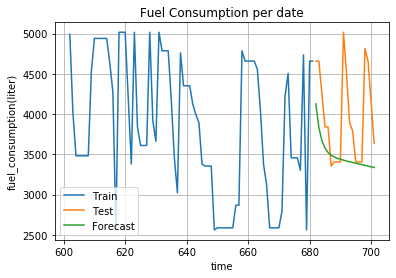

In [63]:
#building the model
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Forecast'])

#plot the predictions for validation set    
plt.plot(train, label='Train')
plt.plot(valid, label='Test')
plt.plot(forecast, label='Forecast')

#labels=list(data1.columns.difference(['time']))
plt.legend()
plt.xlabel('time')
plt.ylabel('fuel_consumption(liter)')
plt.title('Fuel Consumption per date')
plt.grid()
plt.show()

## Actual vs Forecast Fuel Consumption

In [64]:
pd.merge(valid,forecast,right_index=True, left_index=True)

,fuel_consumption(liter),Forecast
682,4659.2,4126.429650
683,4659.2,3833.091294
684,4249.6,3669.768238
685,3840.0,3577.045513
686,3840.0,3522.659867
687,3353.6,3489.091852
688,3404.8,3466.828135
689,3404.8,3450.702827
690,3404.8,3437.910771
691,5017.6,3426.928723


## Calculate MSE

In [65]:
#calculate mse
mse = mean_squared_error(valid,forecast)
mse

507107.376613055

## Engine 8: Operating Hours forecast

In [66]:
data1= data[data['engine_id']==engines[7]]
data1= data1[['time','operating_hours']]
len(data1)

100

## Train Test Split

In [67]:
#divide into train and validation set
train = data1[:int(0.8*(len(data1)))]
valid = data1[int(0.8*(len(data1))):]

#preprocessing (since arima takes univariate series as input)
train.drop('time',axis=1,inplace=True)
valid.drop('time',axis=1,inplace=True)

C:\Users\sid33.SINHA\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


##  Operating Hours Forecasting Model (ARIMA)

Performing stepwise search to minimize aic
Fit ARIMA: (2, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=410.131, BIC=424.271, Time=0.620 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=450.524, BIC=455.238, Time=0.014 seconds
Fit ARIMA: (1, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=452.492, BIC=459.562, Time=0.049 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=452.405, BIC=459.475, Time=0.069 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=False); AIC=448.525, BIC=450.882, Time=0.017 seconds
Fit ARIMA: (1, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=422.635, BIC=434.419, Time=0.608 seconds
Near non-invertible roots for order (1, 2, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (2, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=415.163, BIC=426.947, Time=0.438 seconds
Near non-invertible roots for order (2, 2, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the bo

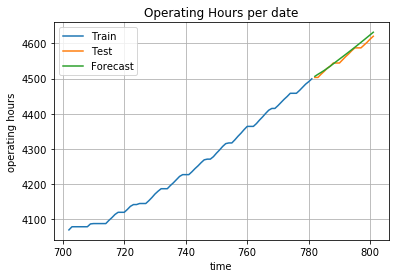

In [68]:
#building the model
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Forecast'])

#plot the predictions for validation set    
plt.plot(train, label='Train')
plt.plot(valid, label='Test')
plt.plot(forecast, label='Forecast')

#labels=list(data1.columns.difference(['time']))
plt.legend()
plt.xlabel('time')
plt.ylabel('operating hours')
plt.title('Operating Hours per date')
plt.grid()
plt.show()

## Actual vs Forecast Operating Hours

In [69]:
pd.merge(valid,forecast,right_index=True, left_index=True)

,operating_hours,Forecast
782,4503,4506.119575
783,4503,4511.888220
784,4512,4517.177390
785,4520,4522.688195
786,4529,4528.695568
787,4535,4535.127162
788,4544,4541.771701
789,4544,4548.450960
790,4544,4555.089908
791,4553,4561.701718


## Calculate MSE

In [70]:
#calculate mse
mse = mean_squared_error(valid,forecast)
mse

71.58996394375772

## Engine 8: Fuel Consumption Forecast

## Train Test Split

In [71]:
data1_= data[data['engine_id']==engines[7]]
data1_= data1_[['time','fuel_consumption(liter)']]
#divide into train and validation set
train = data1_[:int(0.8*(len(data1_)))]
valid = data1_[int(0.8*(len(data1_))):]

#preprocessing (since arima takes univariate series as input)
train.drop('time',axis=1,inplace=True)
valid.drop('time',axis=1,inplace=True)

C:\Users\sid33.SINHA\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Fuel Consumption Forecasting Model (ARIMA)

Performing stepwise search to minimize aic
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=1101.689, BIC=1115.981, Time=0.181 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1117.210, BIC=1121.974, Time=0.010 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1100.044, BIC=1107.190, Time=0.036 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=1106.490, BIC=1113.636, Time=0.075 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=1534.821, BIC=1537.203, Time=0.004 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1100.492, BIC=1110.020, Time=0.028 seconds
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=1101.649, BIC=1111.177, Time=0.050 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=1101.804, BIC=1113.714, Time=0.115 seconds
Total fit time: 0.503 seconds


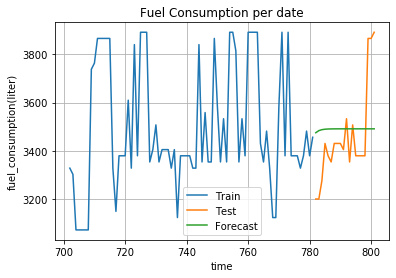

In [72]:
#building the model
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Forecast'])

#plot the predictions for validation set    
plt.plot(train, label='Train')
plt.plot(valid, label='Test')
plt.plot(forecast, label='Forecast')

#labels=list(data1.columns.difference(['time']))
plt.legend()
plt.xlabel('time')
plt.ylabel('fuel_consumption(liter)')
plt.title('Fuel Consumption per date')
plt.grid()
plt.show()

## Actual vs Forecast Fuel Consumption

In [73]:
pd.merge(valid,forecast,right_index=True, left_index=True)

,fuel_consumption(liter),Forecast
782,3200.0,3474.788800
783,3200.0,3483.470552
784,3276.8,3487.482133
785,3430.4,3489.335767
786,3379.2,3490.192277
787,3353.6,3490.588045
788,3430.4,3490.770917
789,3430.4,3490.855417
790,3430.4,3490.894462
791,3404.8,3490.912504


## Calculate MSE

In [74]:
#calculate mse
mse = mean_squared_error(valid,forecast)
mse

38248.463889472085

## Engine 9: Operating Hours forecast

In [75]:
data1= data[data['engine_id']==engines[8]]
data1= data1[['time','operating_hours']]
len(data1)

100

## Train Test Split

In [76]:
#divide into train and validation set
train = data1[:int(0.8*(len(data1)))]
valid = data1[int(0.8*(len(data1))):]

#preprocessing (since arima takes univariate series as input)
train.drop('time',axis=1,inplace=True)
valid.drop('time',axis=1,inplace=True)

C:\Users\sid33.SINHA\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


##  Operating Hours Forecasting Model (ARIMA)

Performing stepwise search to minimize aic
Fit ARIMA: (2, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=386.531, BIC=400.671, Time=0.211 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=405.110, BIC=409.823, Time=0.018 seconds
Fit ARIMA: (1, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=399.725, BIC=406.795, Time=0.041 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=388.331, BIC=395.401, Time=0.064 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=False); AIC=403.156, BIC=405.513, Time=0.016 seconds
Fit ARIMA: (1, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=384.591, BIC=396.374, Time=0.166 seconds
Fit ARIMA: (0, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=386.404, BIC=395.831, Time=0.099 seconds
Fit ARIMA: (1, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=387.389, BIC=396.815, Time=0.098 seconds
Fit ARIMA: (1, 2, 3)x(0, 0, 0, 0) (constant=True); AIC=386.535, BIC=400.675, Time=0.229 seconds
Fit ARIMA: (0, 2, 3)x(0, 0, 0, 0) (constant=True); AIC=387.199, BIC=398.983, Time=0.105 seco

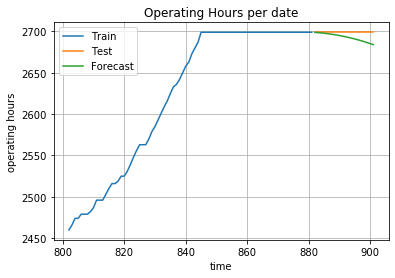

In [77]:
#building the model
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Forecast'])

#plot the predictions for validation set    
plt.plot(train, label='Train')
plt.plot(valid, label='Test')
plt.plot(forecast, label='Forecast')

#labels=list(data1.columns.difference(['time']))
plt.legend()
plt.xlabel('time')
plt.ylabel('operating hours')
plt.title('Operating Hours per date')
plt.grid()
plt.show()

## Actual vs Forecast Operating Hours

In [78]:
pd.merge(valid,forecast,right_index=True, left_index=True)

,operating_hours,Forecast
882,2699,2698.829132
883,2699,2698.523997
884,2699,2698.211036
885,2699,2697.812152
886,2699,2697.375583
887,2699,2696.871533
888,2699,2696.318406
889,2699,2695.704835
890,2699,2695.037842
891,2699,2694.313088


## Calculate MSE

In [79]:
#calculate mse
mse = mean_squared_error(valid,forecast)
mse

56.96161645149308

## Engine 9: Fuel Consumption Forecast

## Train Test Split

In [80]:
data1_= data[data['engine_id']==engines[8]]
data1_= data1_[['time','fuel_consumption(liter)']]
#divide into train and validation set
train = data1_[:int(0.8*(len(data1_)))]
valid = data1_[int(0.8*(len(data1_))):]

#preprocessing (since arima takes univariate series as input)
train.drop('time',axis=1,inplace=True)
valid.drop('time',axis=1,inplace=True)

C:\Users\sid33.SINHA\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Fuel Consumption Forecasting Model (ARIMA)

Performing stepwise search to minimize aic
Fit ARIMA: (2, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1173.944, BIC=1188.161, Time=0.252 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1206.538, BIC=1211.277, Time=0.007 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1193.367, BIC=1200.475, Time=0.018 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1169.861, BIC=1176.969, Time=0.056 seconds
Near non-invertible roots for order (0, 1, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.998)
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=1204.562, BIC=1206.931, Time=0.007 seconds
Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1171.977, BIC=1183.824, Time=0.199 seconds
Near non-invertible roots for order (1, 1, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (2, 1, 1)x(0, 0, 0, 0) (constant=True); A

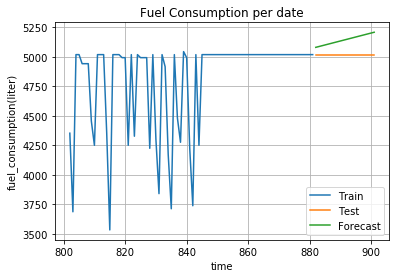

In [81]:
#building the model
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Forecast'])

#plot the predictions for validation set    
plt.plot(train, label='Train')
plt.plot(valid, label='Test')
plt.plot(forecast, label='Forecast')

#labels=list(data1.columns.difference(['time']))
plt.legend()
plt.xlabel('time')
plt.ylabel('fuel_consumption(liter)')
plt.title('Fuel Consumption per date')
plt.grid()
plt.show()

## Actual vs Forecast Fuel Consumption

In [82]:
pd.merge(valid,forecast,right_index=True, left_index=True)

,fuel_consumption(liter),Forecast
882,5017.6,5079.228583
883,5017.6,5085.961510
884,5017.6,5092.694437
885,5017.6,5099.427364
886,5017.6,5106.160291
887,5017.6,5112.893218
888,5017.6,5119.626146
889,5017.6,5126.359073
890,5017.6,5133.092000
891,5017.6,5139.824927


## Calculate MSE

In [83]:
#calculate mse
mse = mean_squared_error(valid,forecast)
mse

17280.496603700667

## Engine 10: Operating Hours forecast

In [84]:
data1= data[data['engine_id']==engines[9]]
data1= data1[['time','operating_hours']]
len(data1)

100

## Train Test Split

In [85]:
#divide into train and validation set
train = data1[:int(0.8*(len(data1)))]
valid = data1[int(0.8*(len(data1))):]

#preprocessing (since arima takes univariate series as input)
train.drop('time',axis=1,inplace=True)
valid.drop('time',axis=1,inplace=True)

C:\Users\sid33.SINHA\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


##  Operating Hours Forecasting Model (ARIMA)

Performing stepwise search to minimize aic
Fit ARIMA: (2, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=505.089, BIC=519.306, Time=0.334 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=508.566, BIC=513.305, Time=0.007 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=501.669, BIC=508.777, Time=0.029 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=499.688, BIC=506.796, Time=0.042 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=608.179, BIC=610.549, Time=0.007 seconds
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=501.688, BIC=511.166, Time=0.084 seconds
Fit ARIMA: (0, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=501.688, BIC=511.166, Time=0.060 seconds
Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=503.686, BIC=515.533, Time=0.069 seconds
Total fit time: 0.635 seconds


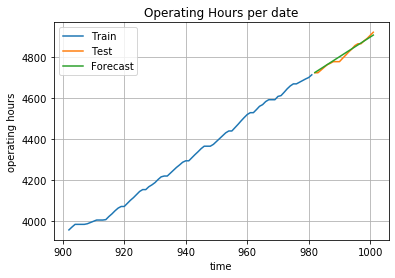

In [86]:
#building the model
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Forecast'])

#plot the predictions for validation set    
plt.plot(train, label='Train')
plt.plot(valid, label='Test')
plt.plot(forecast, label='Forecast')

#labels=list(data1.columns.difference(['time']))
plt.legend()
plt.xlabel('time')
plt.ylabel('operating hours')
plt.title('Operating Hours per date')
plt.grid()
plt.show()

## Actual vs Forecast Operating Hours

In [87]:
pd.merge(valid,forecast,right_index=True, left_index=True)

,operating_hours,Forecast
982,4723,4724.233604
983,4723,4733.808129
984,4736,4743.382655
985,4749,4752.957181
986,4762,4762.531706
987,4769,4772.106232
988,4777,4781.680758
989,4777,4791.255283
990,4777,4800.829809
991,4793,4810.404335


## Calculate MSE

In [88]:
#calculate mse
mse = mean_squared_error(valid,forecast)
mse

91.46581519289039

## Engine 10: Fuel Consumption Forecast

## Train Test Split

In [89]:
data1_= data[data['engine_id']==engines[9]]
data1_= data1_[['time','fuel_consumption(liter)']]
#divide into train and validation set
train = data1_[:int(0.8*(len(data1_)))]
valid = data1_[int(0.8*(len(data1_))):]

#preprocessing (since arima takes univariate series as input)
train.drop('time',axis=1,inplace=True)
valid.drop('time',axis=1,inplace=True)

C:\Users\sid33.SINHA\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Fuel Consumption Forecasting Model (ARIMA)

Performing stepwise search to minimize aic
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=1268.095, BIC=1282.387, Time=0.339 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1270.644, BIC=1275.408, Time=0.006 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1265.936, BIC=1273.082, Time=0.012 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=1263.080, BIC=1270.226, Time=0.110 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=1581.575, BIC=1583.957, Time=0.005 seconds
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=1266.207, BIC=1275.735, Time=0.050 seconds
Fit ARIMA: (0, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=1264.118, BIC=1273.647, Time=0.138 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=1266.970, BIC=1278.880, Time=0.081 seconds
Total fit time: 0.747 seconds


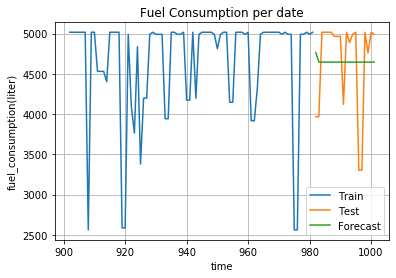

In [90]:
#building the model
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Forecast'])

#plot the predictions for validation set    
plt.plot(train, label='Train')
plt.plot(valid, label='Test')
plt.plot(forecast, label='Forecast')

#labels=list(data1.columns.difference(['time']))
plt.legend()
plt.xlabel('time')
plt.ylabel('fuel_consumption(liter)')
plt.title('Fuel Consumption per date')
plt.grid()
plt.show()

## Actual vs Forecast Fuel Consumption

In [91]:
pd.merge(valid,forecast,right_index=True, left_index=True)

,fuel_consumption(liter),Forecast
982,3968.0,4763.694864
983,3968.0,4646.577716
984,5017.6,4646.577716
985,5017.6,4646.577716
986,5017.6,4646.577716
987,5017.6,4646.577716
988,4966.4,4646.577716
989,4966.4,4646.577716
990,4966.4,4646.577716
991,4121.6,4646.577716


## Calculate MSE

In [92]:
#calculate mse
mse = mean_squared_error(valid,forecast)
mse

335093.4663555881

## Engine 11: Operating Hours forecast

In [93]:
data1= data[data['engine_id']==engines[10]]
data1= data1[['time','operating_hours']]
len(data1)

100

## Train Test Split

In [94]:
#divide into train and validation set
train = data1[:int(0.8*(len(data1)))]
valid = data1[int(0.8*(len(data1))):]

#preprocessing (since arima takes univariate series as input)
train.drop('time',axis=1,inplace=True)
valid.drop('time',axis=1,inplace=True)

C:\Users\sid33.SINHA\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


##  Operating Hours Forecasting Model (ARIMA)

Performing stepwise search to minimize aic
Fit ARIMA: (2, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=463.455, BIC=477.672, Time=0.228 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=463.008, BIC=467.747, Time=0.007 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=460.316, BIC=467.425, Time=0.031 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=458.653, BIC=465.761, Time=0.040 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=568.988, BIC=571.358, Time=0.007 seconds
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=460.457, BIC=469.935, Time=0.070 seconds
Fit ARIMA: (0, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=460.155, BIC=469.632, Time=0.043 seconds
Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=461.488, BIC=473.335, Time=0.121 seconds
Total fit time: 0.551 seconds


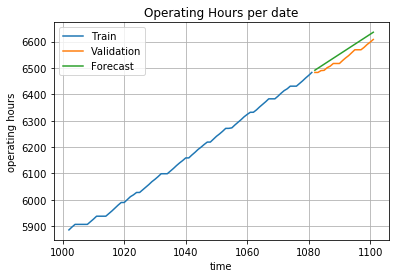

In [95]:
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Forecast'])

#plot the predictions for validation set    
plt.plot(train, label='Train')
plt.plot(valid, label='Validation')
plt.plot(forecast, label='Forecast')

#labels=list(data1.columns.difference(['time']))
plt.legend()
plt.xlabel('time')
plt.ylabel('operating hours')
plt.title('Operating Hours per date')
plt.grid()
plt.show()

## Actual vs Forecast Operating Hours

In [96]:
pd.merge(valid,forecast,right_index=True, left_index=True)

,operating_hours,Forecast
1082,6483,6491.488301
1083,6483,6499.064570
1084,6490,6506.640839
1085,6491,6514.217108
1086,6501,6521.793377
1087,6507,6529.369647
1088,6517,6536.945916
1089,6517,6544.522185
1090,6517,6552.098454
1091,6528,6559.674723


## MSE (Mean Squared Error)

In [97]:
#calculate mse
mse = mean_squared_error(valid,forecast)
mse

704.1962666150524

## Engine 11: Fuel Consumption Forecast

## Train Test Split

In [98]:
data1_= data[data['engine_id']==engines[10]]
data1_= data1_[['time','fuel_consumption(liter)']]
#divide into train and validation set
train = data1_[:int(0.8*(len(data1_)))]
valid = data1_[int(0.8*(len(data1_))):]

#preprocessing (since arima takes univariate series as input)
train.drop('time',axis=1,inplace=True)
valid.drop('time',axis=1,inplace=True)

C:\Users\sid33.SINHA\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Fuel Consumption Forecasting Model (ARIMA)

Performing stepwise search to minimize aic
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=989.956, BIC=1004.248, Time=0.167 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=982.040, BIC=986.804, Time=0.006 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=983.920, BIC=991.066, Time=0.032 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=983.926, BIC=991.072, Time=0.052 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=1590.854, BIC=1593.236, Time=0.005 seconds
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=986.007, BIC=995.536, Time=0.050 seconds
Total fit time: 0.318 seconds


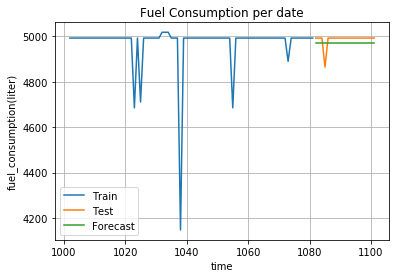

In [99]:
#building the model
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Forecast'])

#plot the predictions for validation set    
plt.plot(train, label='Train')
plt.plot(valid, label='Test')
plt.plot(forecast, label='Forecast')

#labels=list(data1.columns.difference(['time']))
plt.legend()
plt.xlabel('time')
plt.ylabel('fuel_consumption(liter)')
plt.title('Fuel Consumption per date')
plt.grid()
plt.show()

## Actual vs Forecast Fuel Consumption

In [100]:
pd.merge(valid,forecast,right_index=True, left_index=True)

,fuel_consumption(liter),Forecast
1082,4992.0,4969.92
1083,4992.0,4969.92
1084,4992.0,4969.92
1085,4864.0,4969.92
1086,4992.0,4969.92
1087,4992.0,4969.92
1088,4992.0,4969.92
1089,4992.0,4969.92
1090,4992.0,4969.92
1091,4992.0,4969.92


## Calculate MSE

In [101]:
mse = mean_squared_error(valid,forecast)
mse

1024.1023999999975

## Engine 12: Operating Hours forecast

In [102]:
data1= data[data['engine_id']==engines[11]]
data1= data1[['time','operating_hours']]
len(data1)

101

## Train Test Split

In [103]:
#divide into train and validation set
train = data1[:int(0.8*(len(data1)))]
valid = data1[int(0.8*(len(data1))):]

#preprocessing (since arima takes univariate series as input)
train.drop('time',axis=1,inplace=True)
valid.drop('time',axis=1,inplace=True)

C:\Users\sid33.SINHA\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


##  Operating Hours Forecasting Model (ARIMA)

Performing stepwise search to minimize aic
Fit ARIMA: (2, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=500.960, BIC=515.100, Time=0.345 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=507.711, BIC=512.425, Time=0.007 seconds
Fit ARIMA: (1, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=509.515, BIC=516.585, Time=0.016 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=509.139, BIC=516.210, Time=0.040 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=False); AIC=505.893, BIC=508.250, Time=0.007 seconds
Fit ARIMA: (1, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=498.227, BIC=510.010, Time=0.089 seconds
Fit ARIMA: (0, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=496.596, BIC=506.023, Time=0.051 seconds
Fit ARIMA: (0, 2, 3)x(0, 0, 0, 0) (constant=True); AIC=498.227, BIC=510.011, Time=0.080 seconds
Fit ARIMA: (1, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=500.622, BIC=510.049, Time=0.163 seconds
Near non-invertible roots for order (1, 2, 1)(0, 0, 0, 0); setting score to inf (at least on

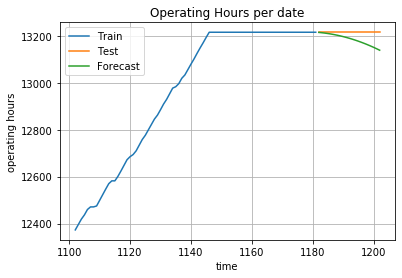

In [104]:
#building the model
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Forecast'])

#plot the predictions for validation set    
plt.plot(train, label='Train')
plt.plot(valid, label='Test')
plt.plot(forecast, label='Forecast')

#labels=list(data1.columns.difference(['time']))
plt.legend()
plt.xlabel('time')
plt.ylabel('operating hours')
plt.title('Operating Hours per date')
plt.grid()
plt.show()

## Actual vs Forecast Operating Hours

In [105]:
pd.merge(valid,forecast,right_index=True, left_index=True)

,operating_hours,Forecast
1182,13215,13214.274490
1183,13215,13212.960477
1184,13215,13211.385814
1185,13215,13209.550500
1186,13215,13207.454536
1187,13215,13205.097921
1188,13215,13202.480657
1189,13215,13199.602741
1190,13215,13196.464176
1191,13215,13193.064960


## Calculate MSE

In [106]:
#calculate mse
mse = mean_squared_error(valid,forecast)
mse

1467.4296533483418

## Engine 12: Fuel Consumption Forecast

## Train Test Split

In [107]:
data1_= data[data['engine_id']==engines[11]]
data1_= data1_[['time','fuel_consumption(liter)']]
#divide into train and validation set
train = data1_[:int(0.8*(len(data1_)))]
valid = data1_[int(0.8*(len(data1_))):]

#preprocessing (since arima takes univariate series as input)
train.drop('time',axis=1,inplace=True)
valid.drop('time',axis=1,inplace=True)

C:\Users\sid33.SINHA\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Fuel Consumption Forecasting Model (ARIMA)

Performing stepwise search to minimize aic
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=1146.577, BIC=1160.869, Time=0.239 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1154.316, BIC=1159.080, Time=0.006 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1140.895, BIC=1148.041, Time=0.014 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=1144.155, BIC=1151.301, Time=0.087 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=1581.584, BIC=1583.966, Time=0.004 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1142.801, BIC=1152.329, Time=0.039 seconds
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=1142.930, BIC=1152.458, Time=0.040 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=1144.753, BIC=1156.663, Time=0.093 seconds
Total fit time: 0.528 seconds


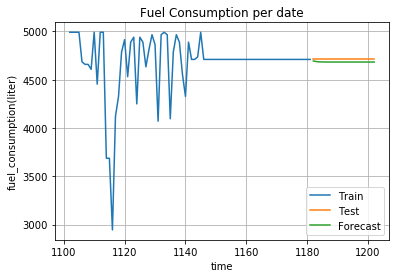

In [108]:
#building the model
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Forecast'])

#plot the predictions for validation set    
plt.plot(train, label='Train')
plt.plot(valid, label='Test')
plt.plot(forecast, label='Forecast')

#labels=list(data1.columns.difference(['time']))
plt.legend()
plt.xlabel('time')
plt.ylabel('fuel_consumption(liter)')
plt.title('Fuel Consumption per date')
plt.grid()
plt.show()

## Actual vs Forecast Fuel Consumption

In [109]:
pd.merge(valid,forecast,right_index=True, left_index=True)

,fuel_consumption(liter),Forecast
1182,4710.4,4694.695884
1183,4710.4,4688.103700
1184,4710.4,4685.336471
1185,4710.4,4684.174860
1186,4710.4,4683.687245
1187,4710.4,4683.482557
1188,4710.4,4683.396634
1189,4710.4,4683.360566
1190,4710.4,4683.345425
1191,4710.4,4683.339070


## Calculate MSE

In [110]:
mse = mean_squared_error(valid,forecast)
mse

689.5309709016752

## Engine 13: Operating Hours forecast

In [111]:
data1= data[data['engine_id']==engines[12]]
data1= data1[['time','operating_hours']]
len(data1)

100

## Train Test Split

In [112]:
#divide into train and validation set
train = data1[:int(0.8*(len(data1)))]
valid = data1[int(0.8*(len(data1))):]

#preprocessing (since arima takes univariate series as input)
train.drop('time',axis=1,inplace=True)
valid.drop('time',axis=1,inplace=True)

C:\Users\sid33.SINHA\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


##  Operating Hours Forecasting Model (ARIMA)

Performing stepwise search to minimize aic
Fit ARIMA: (2, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=392.414, BIC=406.554, Time=0.458 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=420.394, BIC=425.108, Time=0.007 seconds
Fit ARIMA: (1, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=421.510, BIC=428.580, Time=0.019 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=420.741, BIC=427.811, Time=0.025 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=False); AIC=418.499, BIC=420.856, Time=0.007 seconds
Fit ARIMA: (1, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=405.960, BIC=417.743, Time=0.271 seconds
Near non-invertible roots for order (1, 2, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (2, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=404.788, BIC=416.572, Time=0.110 seconds
Fit ARIMA: (3, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=393.073, BIC=409.570, Time=0.458 seconds
Fit ARIMA: (2, 2, 3)x(0, 0, 0,

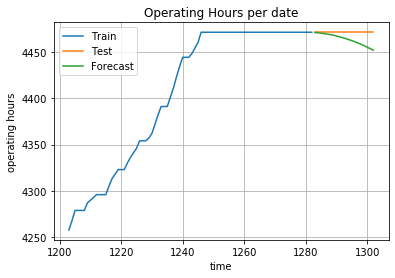

In [113]:
#building the model
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Forecast'])

#plot the predictions for validation set    
plt.plot(train, label='Train')
plt.plot(valid, label='Test')
plt.plot(forecast, label='Forecast')

#labels=list(data1.columns.difference(['time']))
plt.legend()
plt.xlabel('time')
plt.ylabel('operating hours')
plt.title('Operating Hours per date')
plt.grid()
plt.show()

## Actual vs Forecast Operating Hours

In [114]:
pd.merge(valid,forecast,right_index=True, left_index=True)

,operating_hours,Forecast
1283,4471,4470.756703
1284,4471,4470.403223
1285,4471,4469.982276
1286,4471,4469.525850
1287,4471,4469.032856
1288,4471,4468.472027
1289,4471,4467.806375
1290,4471,4467.020188
1291,4471,4466.128991
1292,4471,4465.166356


## Calculate MSE

In [115]:
#calculate mse
mse = mean_squared_error(valid,forecast)
mse

92.51567090549557

## Engine 13: Fuel Consumption Forecast

## Train Test Split

In [116]:
data1_= data[data['engine_id']==engines[12]]
data1_= data1_[['time','fuel_consumption(liter)']]
#divide into train and validation set
train = data1_[:int(0.8*(len(data1_)))]
valid = data1_[int(0.8*(len(data1_))):]

#preprocessing (since arima takes univariate series as input)
train.drop('time',axis=1,inplace=True)
valid.drop('time',axis=1,inplace=True)

C:\Users\sid33.SINHA\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Fuel Consumption Forecasting Model (ARIMA)

Performing stepwise search to minimize aic
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=1214.024, BIC=1228.316, Time=0.263 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1219.012, BIC=1223.776, Time=0.008 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1209.719, BIC=1216.865, Time=0.013 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=1212.160, BIC=1219.306, Time=0.096 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=1556.161, BIC=1558.543, Time=0.005 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1211.376, BIC=1220.905, Time=0.045 seconds
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=1211.666, BIC=1221.194, Time=0.027 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=1213.245, BIC=1225.155, Time=0.083 seconds
Total fit time: 0.544 seconds


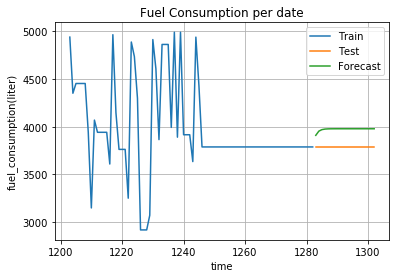

In [117]:
#building the model
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Forecast'])

#plot the predictions for validation set    
plt.plot(train, label='Train')
plt.plot(valid, label='Test')
plt.plot(forecast, label='Forecast')

#labels=list(data1.columns.difference(['time']))
plt.legend()
plt.xlabel('time')
plt.ylabel('fuel_consumption(liter)')
plt.title('Fuel Consumption per date')
plt.grid()
plt.show()

## Actual vs Forecast Fuel Consumption

In [118]:
pd.merge(valid,forecast,right_index=True, left_index=True)

,fuel_consumption(liter),Forecast
1283,3788.8,3910.557013
1284,3788.8,3954.569015
1285,3788.8,3970.478212
1286,3788.8,3976.228975
1287,3788.8,3978.307726
1288,3788.8,3979.059141
1289,3788.8,3979.330757
1290,3788.8,3979.428940
1291,3788.8,3979.464430
1292,3788.8,3979.477259


## Calculate MSE

In [119]:
#calculate mse
mse = mean_squared_error(valid,forecast)
mse

34575.44268106289

## Engine 14: Operating Hours forecast

In [120]:
data1= data[data['engine_id']==engines[13]]
data1= data1[['time','operating_hours']]
len(data1)

100

## Train Test Split

In [121]:
#divide into train and validation set
train = data1[:int(0.8*(len(data1)))]
valid = data1[int(0.8*(len(data1))):]

#preprocessing (since arima takes univariate series as input)
train.drop('time',axis=1,inplace=True)
valid.drop('time',axis=1,inplace=True)

C:\Users\sid33.SINHA\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


##  Operating Hours Forecasting Model (ARIMA)

Performing stepwise search to minimize aic
Fit ARIMA: (2, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=286.284, BIC=300.500, Time=0.456 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=312.222, BIC=316.961, Time=0.006 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=305.831, BIC=312.939, Time=0.019 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=303.271, BIC=310.379, Time=0.032 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=371.166, BIC=373.535, Time=0.007 seconds
Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=306.976, BIC=318.823, Time=0.155 seconds
Fit ARIMA: (2, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=303.736, BIC=315.583, Time=0.100 seconds
Fit ARIMA: (3, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=307.375, BIC=323.961, Time=0.209 seconds
Fit ARIMA: (2, 1, 3)x(0, 0, 0, 0) (constant=True); AIC=288.111, BIC=304.697, Time=0.417 seconds
Near non-invertible roots for order (2, 1, 3)(0, 0, 0, 0); setting score to inf (at least on

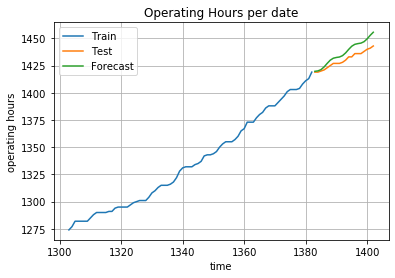

In [122]:
#building the model
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Forecast'])

#plot the predictions for validation set    
plt.plot(train, label='Train')
plt.plot(valid, label='Test')
plt.plot(forecast, label='Forecast')

#labels=list(data1.columns.difference(['time']))
plt.legend()
plt.xlabel('time')
plt.ylabel('operating hours')
plt.title('Operating Hours per date')
plt.grid()
plt.show()

## Actual vs Forecast Operating Hours

In [123]:
pd.merge(valid,forecast,right_index=True, left_index=True)

,operating_hours,Forecast
1383,1419,1419.716817
1384,1419,1420.115408
1385,1420,1421.290337
1386,1421,1423.740543
1387,1423,1426.990271
1388,1425,1429.954959
1389,1427,1431.770696
1390,1427,1432.452903
1391,1427,1432.882039
1392,1428,1434.129170


## Calculate MSE

In [124]:
#calculate mse
mse = mean_squared_error(valid,forecast)
mse

54.19261588603886

## Engine 14: Fuel Consumption Forecast

## Train Test Split

In [125]:
data1_= data[data['engine_id']==engines[13]]
data1_= data1_[['time','fuel_consumption(liter)']]
#divide into train and validation set
train = data1_[:int(0.8*(len(data1_)))]
valid = data1_[int(0.8*(len(data1_))):]

#preprocessing (since arima takes univariate series as input)
train.drop('time',axis=1,inplace=True)
valid.drop('time',axis=1,inplace=True)

C:\Users\sid33.SINHA\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Fuel Consumption Forecasting Model (ARIMA)

Performing stepwise search to minimize aic
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=1225.035, BIC=1239.327, Time=0.108 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1242.655, BIC=1247.419, Time=0.006 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1217.621, BIC=1224.767, Time=0.012 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=1220.470, BIC=1227.617, Time=0.067 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=1550.807, BIC=1553.189, Time=0.006 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1218.471, BIC=1227.999, Time=0.034 seconds
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=1218.835, BIC=1228.363, Time=0.024 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=1220.532, BIC=1232.442, Time=0.113 seconds
Total fit time: 0.373 seconds


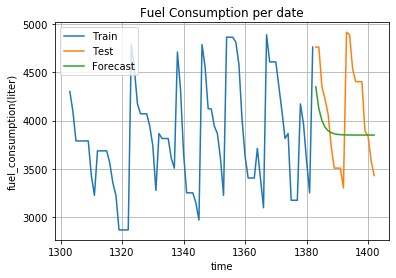

In [126]:
#building the model
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Forecast'])

#plot the predictions for validation set    
plt.plot(train, label='Train')
plt.plot(valid, label='Test')
plt.plot(forecast, label='Forecast')

#labels=list(data1.columns.difference(['time']))
plt.legend()
plt.xlabel('time')
plt.ylabel('fuel_consumption(liter)')
plt.title('Fuel Consumption per date')
plt.grid()
plt.show()

## Actual vs Forecast Fuel Consumption

In [127]:
pd.merge(valid,forecast,right_index=True, left_index=True)

,fuel_consumption(liter),Forecast
1383,4761.6,4349.180677
1384,4761.6,4123.353492
1385,4352.0,3999.697992
1386,4224.0,3931.988329
1387,4070.4,3894.912756
1388,3737.6,3874.611398
1389,3507.2,3863.495046
1390,3507.2,3857.408099
1391,3507.2,3854.075088
1392,3302.4,3852.250042


## Calculate MSE

In [128]:
#calculate mse
mse = mean_squared_error(valid,forecast)
mse

267482.869972213

## Engine 15: Operating Hours forecast

In [129]:
data1= data[data['engine_id']==engines[14]]
data1= data1[['time','operating_hours']]
len(data1)

100

## Train Test Split

In [130]:
#divide into train and validation set
train = data1[:int(0.8*(len(data1)))]
valid = data1[int(0.8*(len(data1))):]

#preprocessing (since arima takes univariate series as input)
train.drop('time',axis=1,inplace=True)
valid.drop('time',axis=1,inplace=True)

C:\Users\sid33.SINHA\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


##  Operating Hours Forecasting Model (ARIMA)

Performing stepwise search to minimize aic
Fit ARIMA: (2, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=356.434, BIC=370.650, Time=0.309 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=367.273, BIC=372.012, Time=0.007 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=362.489, BIC=369.597, Time=0.025 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=357.513, BIC=364.621, Time=0.029 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=447.567, BIC=449.936, Time=0.007 seconds
Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=349.342, BIC=361.189, Time=0.197 seconds
Near non-invertible roots for order (1, 1, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (2, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=351.795, BIC=363.642, Time=0.133 seconds
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=348.655, BIC=358.133, Time=0.189 seconds
Near non-invertible roots for 

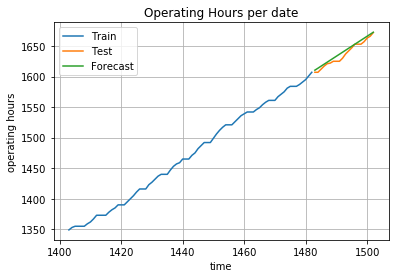

In [131]:
#building the model
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Forecast'])

#plot the predictions for validation set    
plt.plot(train, label='Train')
plt.plot(valid, label='Test')
plt.plot(forecast, label='Forecast')

#labels=list(data1.columns.difference(['time']))
plt.legend()
plt.xlabel('time')
plt.ylabel('operating hours')
plt.title('Operating Hours per date')
plt.grid()
plt.show()

## Actual vs Forecast Operating Hours

In [132]:
pd.merge(valid,forecast,right_index=True, left_index=True)

,operating_hours,Forecast
1483,1607,1610.463531
1484,1607,1613.645511
1485,1612,1616.954140
1486,1617,1620.205799
1487,1621,1623.483084
1488,1622,1626.748842
1489,1625,1630.019786
1490,1625,1633.288397
1491,1625,1636.558057
1492,1630,1639.827245


## Calculate MSE

In [133]:
#calculate mse
mse = mean_squared_error(valid,forecast)
mse

30.544942033285473

## Engine 15: Fuel Consumption Forecast

## Train Test Split

In [134]:
data1_= data[data['engine_id']==engines[14]]
data1_= data1_[['time','fuel_consumption(liter)']]
#divide into train and validation set
train = data1_[:int(0.8*(len(data1_)))]
valid = data1_[int(0.8*(len(data1_))):]

#preprocessing (since arima takes univariate series as input)
train.drop('time',axis=1,inplace=True)
valid.drop('time',axis=1,inplace=True)

C:\Users\sid33.SINHA\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Fuel Consumption Forecasting Model (ARIMA)

Performing stepwise search to minimize aic
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=1258.963, BIC=1273.255, Time=0.244 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1254.599, BIC=1259.363, Time=0.006 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1254.512, BIC=1261.658, Time=0.013 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=1253.920, BIC=1261.066, Time=0.022 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=1568.626, BIC=1571.008, Time=0.005 seconds
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=1255.935, BIC=1265.463, Time=0.042 seconds
Fit ARIMA: (0, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=1254.993, BIC=1264.522, Time=0.096 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=1257.048, BIC=1268.958, Time=0.068 seconds
Total fit time: 0.499 seconds


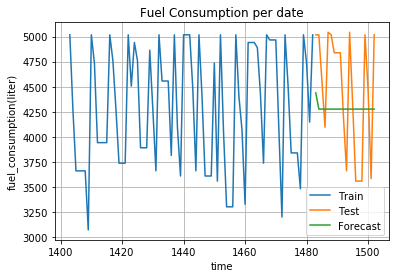

In [135]:
#building the model
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Forecast'])

#plot the predictions for validation set    
plt.plot(train, label='Train')
plt.plot(valid, label='Test')
plt.plot(forecast, label='Forecast')

#labels=list(data1.columns.difference(['time']))
plt.legend()
plt.xlabel('time')
plt.ylabel('fuel_consumption(liter)')
plt.title('Fuel Consumption per date')
plt.grid()
plt.show()

## Actual vs Forecast Fuel Consumption

In [136]:
pd.merge(valid,forecast,right_index=True, left_index=True)

,fuel_consumption(liter),Forecast
1483,5017.6,4438.602286
1484,5017.6,4276.715270
1485,4556.8,4276.715270
1486,4096.0,4276.715270
1487,5043.2,4276.715270
1488,5017.6,4276.715270
1489,4838.4,4276.715270
1490,4838.4,4276.715270
1491,4838.4,4276.715270
1492,4198.4,4276.715270


## Calculate MSE

In [137]:
#calculate mse
mse = mean_squared_error(valid,forecast)
mse

361025.7262240512

## Engine 16: Operating Hours forecast

In [138]:
data1= data[data['engine_id']==engines[15]]
data1= data1[['time','operating_hours']]
len(data1)

100

## Train Test Split

In [139]:
#divide into train and validation set
train = data1[:int(0.8*(len(data1)))]
valid = data1[int(0.8*(len(data1))):]

#preprocessing (since arima takes univariate series as input)
train.drop('time',axis=1,inplace=True)
valid.drop('time',axis=1,inplace=True)

C:\Users\sid33.SINHA\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


##  Operating Hours Forecasting Model (ARIMA)

Performing stepwise search to minimize aic
Fit ARIMA: (2, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=373.760, BIC=387.977, Time=0.746 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=422.279, BIC=427.018, Time=0.014 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=414.229, BIC=421.338, Time=0.044 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=410.835, BIC=417.943, Time=0.061 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=500.204, BIC=502.573, Time=0.014 seconds
Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=414.416, BIC=426.263, Time=0.183 seconds
Fit ARIMA: (2, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=400.350, BIC=412.198, Time=0.131 seconds
Fit ARIMA: (3, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=377.000, BIC=393.586, Time=0.349 seconds
Near non-invertible roots for order (3, 1, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.997)
Fit ARIMA: (2, 1, 3)x(0, 0, 0,

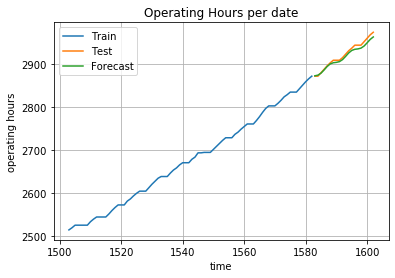

In [140]:
#building the model
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Forecast'])

#plot the predictions for validation set    
plt.plot(train, label='Train')
plt.plot(valid, label='Test')
plt.plot(forecast, label='Forecast')

#labels=list(data1.columns.difference(['time']))
plt.legend()
plt.xlabel('time')
plt.ylabel('operating hours')
plt.title('Operating Hours per date')
plt.grid()
plt.show()

## Actual vs Forecast Operating Hours

In [141]:
pd.merge(valid,forecast,right_index=True, left_index=True)

,operating_hours,Forecast
1583,2871,2871.830232
1584,2871,2873.427935
1585,2879,2877.979084
1586,2887,2885.419224
1587,2895,2893.490173
1588,2902,2899.462488
1589,2908,2902.209873
1590,2908,2903.058980
1591,2908,2904.773472
1592,2914,2909.450296


In [142]:
#calculate mse
mse = mean_squared_error(valid,forecast)
mse

42.396596090447574

## Engine 16: Fuel Consumption Forecast

## Train Test Split

In [143]:
data1_= data[data['engine_id']==engines[15]]
data1_= data1_[['time','fuel_consumption(liter)']]
#divide into train and validation set
train = data1_[:int(0.8*(len(data1_)))]
valid = data1_[int(0.8*(len(data1_))):]

#preprocessing (since arima takes univariate series as input)
train.drop('time',axis=1,inplace=True)
valid.drop('time',axis=1,inplace=True)

C:\Users\sid33.SINHA\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Fuel Consumption Forecasting Model (ARIMA)

Performing stepwise search to minimize aic
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=1233.605, BIC=1247.897, Time=0.180 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1234.207, BIC=1238.971, Time=0.006 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1229.775, BIC=1236.921, Time=0.013 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=1231.503, BIC=1238.649, Time=0.055 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=1572.702, BIC=1575.085, Time=0.004 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1229.458, BIC=1238.986, Time=0.041 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1231.220, BIC=1243.130, Time=0.056 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=1231.395, BIC=1243.305, Time=0.068 seconds
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=1230.574, BIC=1240.102, Time=0.038 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=1233.231, BIC=1247.

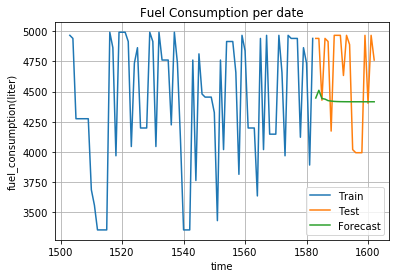

In [144]:
#building the model
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Forecast'])

#plot the predictions for validation set    
plt.plot(train, label='Train')
plt.plot(valid, label='Test')
plt.plot(forecast, label='Forecast')

#labels=list(data1.columns.difference(['time']))
plt.legend()
plt.xlabel('time')
plt.ylabel('fuel_consumption(liter)')
plt.title('Fuel Consumption per date')
plt.grid()
plt.show()

## Actual vs Forecast Fuel Consumption

In [145]:
pd.merge(valid,forecast,right_index=True, left_index=True)

,fuel_consumption(liter),Forecast
1583,4940.8,4446.990267
1584,4940.8,4510.776213
1585,4428.8,4442.533274
1586,4940.8,4437.736367
1587,4915.2,4425.217523
1588,4172.8,4421.574124
1589,4966.4,4418.650713
1590,4966.4,4417.377265
1591,4966.4,4416.598711
1592,4633.6,4416.208793


## Calculate MSE

In [146]:
#calculate mse
mse = mean_squared_error(valid,forecast)
mse

194027.60893834912

## Engine 17: Operating Hours forecast

In [147]:
data1= data[data['engine_id']==engines[16]]
data1= data1[['time','operating_hours']]
len(data1)

100

## Train Test Split

C:\Users\sid33.SINHA\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


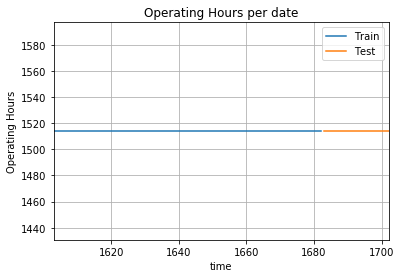

In [148]:
#divide into train and validation set
train = data1[:int(0.8*(len(data1_)))]
valid = data1[int(0.8*(len(data1_))):]

#preprocessing (since arima takes univariate series as input)
train.drop('time',axis=1,inplace=True)
valid.drop('time',axis=1,inplace=True)

#plotting the data
train['operating_hours'].plot(label='Train')
valid['operating_hours'].plot(label='Test')
plt.legend()
plt.xlabel('time')
plt.ylabel('Operating Hours')
plt.title('Operating Hours per date')
plt.grid()
plt.show()

### Operating Hour rate is constant for all 100 days. It seems ambiguous data, thus forecast will be same constant.

In [149]:
data1['operating_hours'].unique()

array([1514], dtype=int64)

## Engine 17: Fuel Consumption Forecast

C:\Users\sid33.SINHA\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


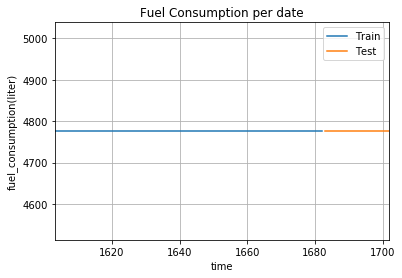

In [150]:
data1_= data[data['engine_id']==engines[16]]
data1_= data1_[['time','fuel_consumption(liter)']]
#divide into train and validation set
train = data1_[:int(0.8*(len(data1_)))]
valid = data1_[int(0.8*(len(data1_))):]

#preprocessing (since arima takes univariate series as input)
train.drop('time',axis=1,inplace=True)
valid.drop('time',axis=1,inplace=True)

#plotting the data
train['fuel_consumption(liter)'].plot(label='Train')
valid['fuel_consumption(liter)'].plot(label='Test')
plt.legend()
plt.xlabel('time')
plt.ylabel('fuel_consumption(liter)')
plt.title('Fuel Consumption per date')
plt.grid()
plt.show()

### Fuel Consumption rate is constant for all 100 days. It seems ambiguous data, thus forecast will be same constant.

In [151]:
data1_['fuel_consumption(liter)'].unique()

array([4776.])

## Engine 18: Operating Hours forecast

In [152]:
data1= data[data['engine_id']==engines[17]]
data1= data1[['time','operating_hours']]
len(data1)

100

## Train Test Split

In [153]:
#divide into train and validation set
train = data1[:int(0.8*(len(data1)))]
valid = data1[int(0.8*(len(data1))):]

#preprocessing (since arima takes univariate series as input)
train.drop('time',axis=1,inplace=True)
valid.drop('time',axis=1,inplace=True)

C:\Users\sid33.SINHA\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


##  Operating Hours Forecasting Model (ARIMA)

Performing stepwise search to minimize aic
Fit ARIMA: (2, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1044.953, BIC=1059.170, Time=0.401 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1037.025, BIC=1041.763, Time=0.006 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1039.016, BIC=1046.124, Time=0.028 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1039.016, BIC=1046.125, Time=0.052 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=1036.362, BIC=1038.732, Time=0.007 seconds
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1041.017, BIC=1050.494, Time=0.096 seconds
Total fit time: 0.595 seconds


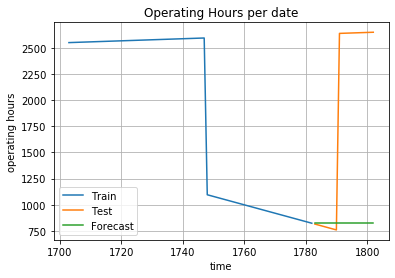

In [154]:
#building the model
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Forecast'])

#plot the predictions for validation set    
plt.plot(train, label='Train')
plt.plot(valid, label='Test')
plt.plot(forecast, label='Forecast')

#labels=list(data1.columns.difference(['time']))
plt.legend()
plt.xlabel('time')
plt.ylabel('operating hours')
plt.title('Operating Hours per date')
plt.grid()
plt.show()

## Actual vs Forecast Operating Hours

In [155]:
pd.merge(valid,forecast,right_index=True, left_index=True)

,operating_hours,Forecast
1783,816,824.0
1784,808,824.0
1785,800,824.0
1786,792,824.0
1787,784,824.0
1788,776,824.0
1789,768,824.0
1790,760,824.0
1791,2638,824.0
1792,2639,824.0


## Calculate MSE

In [156]:
#calculate mse
mse = mean_squared_error(valid,forecast)
mse

1987008.1

## Engine 18: Fuel Consumption Forecast

## Train Test Split

In [157]:
data1_= data[data['engine_id']==engines[17]]
data1_= data1_[['time','fuel_consumption(liter)']]
#divide into train and validation set
train = data1_[:int(0.8*(len(data1_)))]
valid = data1_[int(0.8*(len(data1_))):]

#preprocessing (since arima takes univariate series as input)
train.drop('time',axis=1,inplace=True)
valid.drop('time',axis=1,inplace=True)

C:\Users\sid33.SINHA\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Fuel Consumption Forecasting Model (ARIMA)

Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=nan, BIC=nan, Time=0.030 seconds
Total fit time: 0.031 seconds


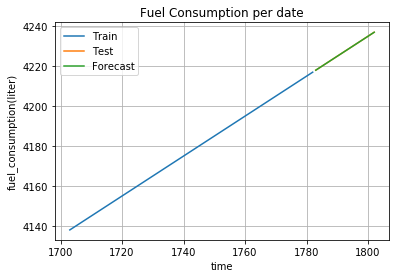

In [158]:
#building the model
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Forecast'])

#plot the predictions for validation set    
plt.plot(train, label='Train')
plt.plot(valid, label='Test')
plt.plot(forecast, label='Forecast')

#labels=list(data1.columns.difference(['time']))
plt.legend()
plt.xlabel('time')
plt.ylabel('fuel_consumption(liter)')
plt.title('Fuel Consumption per date')
plt.grid()
plt.show()

## Actual vs Forecast Fuel Consumption

In [159]:
pd.merge(valid,forecast,right_index=True, left_index=True)

,fuel_consumption(liter),Forecast
1783,4218.0,4218.0
1784,4219.0,4219.0
1785,4220.0,4220.0
1786,4221.0,4221.0
1787,4222.0,4222.0
1788,4223.0,4223.0
1789,4224.0,4224.0
1790,4225.0,4225.0
1791,4226.0,4226.0
1792,4227.0,4227.0


## Calculate MSE

In [160]:
#calculate mse
mse = mean_squared_error(valid,forecast)
mse

0.0

## Engine 19: Operating Hours forecast

In [161]:
data1= data[data['engine_id']==engines[18]]
data1= data1[['time','operating_hours']]
len(data1)

100

## Train Test Split

In [162]:
#divide into train and validation set
train = data1[:int(0.8*(len(data1)))]
valid = data1[int(0.8*(len(data1))):]

#preprocessing (since arima takes univariate series as input)
train.drop('time',axis=1,inplace=True)
valid.drop('time',axis=1,inplace=True)

C:\Users\sid33.SINHA\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


##  Operating Hours Forecasting Model (ARIMA)

Performing stepwise search to minimize aic
Fit ARIMA: (2, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1431.976, BIC=1446.193, Time=0.438 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1424.193, BIC=1428.932, Time=0.014 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1426.197, BIC=1433.305, Time=0.022 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1426.190, BIC=1433.299, Time=0.114 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=1423.233, BIC=1425.603, Time=0.010 seconds
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1428.191, BIC=1437.669, Time=0.164 seconds
Total fit time: 0.769 seconds


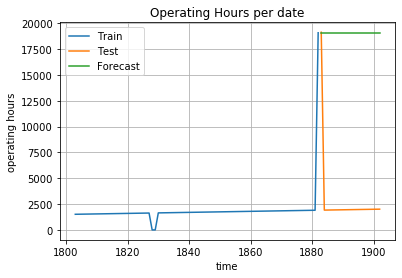

In [163]:
#building the model
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Forecast'])

#plot the predictions for validation set    
plt.plot(train, label='Train')
plt.plot(valid, label='Test')
plt.plot(forecast, label='Forecast')

#labels=list(data1.columns.difference(['time']))
plt.legend()
plt.xlabel('time')
plt.ylabel('operating hours')
plt.title('Operating Hours per date')
plt.grid()
plt.show()

## Actual vs Forecast Operating Hours

In [164]:
pd.merge(valid,forecast,right_index=True, left_index=True)

,operating_hours,Forecast
1883,19140,19090.0
1884,1919,19090.0
1885,1924,19090.0
1886,1929,19090.0
1887,1934,19090.0
1888,1939,19090.0
1889,1944,19090.0
1890,1949,19090.0
1891,1954,19090.0
1892,1959,19090.0


## Calculate MSE

In [165]:
#calculate mse
mse = mean_squared_error(valid,forecast)
mse

278635719.7

## Engine 19: Fuel Consumption Forecast

## Train Test Split

In [166]:
data1_= data[data['engine_id']==engines[18]]
data1_= data1_[['time','fuel_consumption(liter)']]
#divide into train and validation set
train = data1_[:int(0.8*(len(data1_)))]
valid = data1_[int(0.8*(len(data1_))):]

#preprocessing (since arima takes univariate series as input)
train.drop('time',axis=1,inplace=True)
valid.drop('time',axis=1,inplace=True)

C:\Users\sid33.SINHA\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Fuel Consumption Forecasting Model (ARIMA)

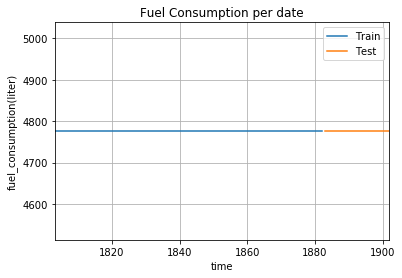

In [167]:
data1_= data[data['engine_id']==engines[18]]
data1_= data1_[['time','fuel_consumption(liter)']]
#divide into train and validation set
train = data1_[:int(0.8*(len(data1_)))]
valid = data1_[int(0.8*(len(data1_))):]

#preprocessing (since arima takes univariate series as input)
train.drop('time',axis=1,inplace=True)
valid.drop('time',axis=1,inplace=True)

#plotting the data
train['fuel_consumption(liter)'].plot(label='Train')
valid['fuel_consumption(liter)'].plot(label='Test')
plt.legend()
plt.xlabel('time')
plt.ylabel('fuel_consumption(liter)')
plt.title('Fuel Consumption per date')
plt.grid()
plt.show()

### Fuel Consumption rate is constant for all 100 days. It seems ambiguous data, thus forecast will be same constant.

In [168]:
data1_['fuel_consumption(liter)'].unique()

array([4776.])

## Engine 20: Operating Hours forecast

In [169]:
data1= data[data['engine_id']==engines[19]]
data1= data1[['time','operating_hours']]
len(data1)

100

## Train Test Split

In [170]:
#divide into train and validation set
train = data1[:int(0.8*(len(data1)))]
valid = data1[int(0.8*(len(data1))):]

#preprocessing (since arima takes univariate series as input)
train.drop('time',axis=1,inplace=True)
valid.drop('time',axis=1,inplace=True)

C:\Users\sid33.SINHA\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


##  Operating Hours Forecasting Model (ARIMA)

Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=nan, BIC=nan, Time=0.046 seconds
Total fit time: 0.053 seconds


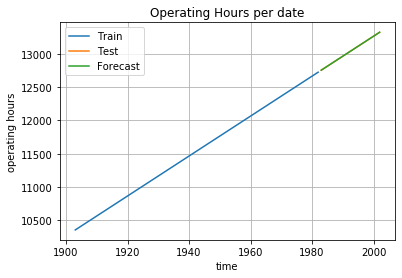

In [171]:
#building the model
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Forecast'])

#plot the predictions for validation set    
plt.plot(train, label='Train')
plt.plot(valid, label='Test')
plt.plot(forecast, label='Forecast')

#labels=list(data1.columns.difference(['time']))
plt.legend()
plt.xlabel('time')
plt.ylabel('operating hours')
plt.title('Operating Hours per date')
plt.grid()
plt.show()

## Actual vs Forecast Operating Hours

In [172]:
pd.merge(valid,forecast,right_index=True, left_index=True)

,operating_hours,Forecast
1983,12756,12756.0
1984,12786,12786.0
1985,12816,12816.0
1986,12846,12846.0
1987,12876,12876.0
1988,12906,12906.0
1989,12936,12936.0
1990,12966,12966.0
1991,12996,12996.0
1992,13026,13026.0


## Calculate MSE

In [173]:
#calculate mse
mse = mean_squared_error(valid,forecast)
mse

0.0

## Engine 20: Fuel Consumption Forecast

## Train Test Split

In [174]:
data1_= data[data['engine_id']==engines[19]]
data1_= data1_[['time','fuel_consumption(liter)']]
#divide into train and validation set
train = data1_[:int(0.8*(len(data1_)))]
valid = data1_[int(0.8*(len(data1_))):]

#preprocessing (since arima takes univariate series as input)
train.drop('time',axis=1,inplace=True)
valid.drop('time',axis=1,inplace=True)

C:\Users\sid33.SINHA\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Fuel Consumption Forecasting Model (ARIMA)

Performing stepwise search to minimize aic
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=658.447, BIC=672.739, Time=0.092 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=785.073, BIC=789.837, Time=0.006 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=652.745, BIC=659.891, Time=0.027 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=714.424, BIC=721.570, Time=0.046 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=1554.025, BIC=1556.407, Time=0.004 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=653.925, BIC=663.453, Time=0.080 seconds
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=653.937, BIC=663.465, Time=0.127 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=655.984, BIC=667.894, Time=0.170 seconds
Total fit time: 0.561 seconds


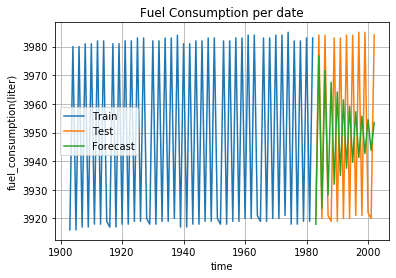

In [175]:
#building the model
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Forecast'])

#plot the predictions for validation set    
plt.plot(train, label='Train')
plt.plot(valid, label='Test')
plt.plot(forecast, label='Forecast')

#labels=list(data1.columns.difference(['time']))
plt.legend()
plt.xlabel('time')
plt.ylabel('fuel_consumption(liter)')
plt.title('Fuel Consumption per date')
plt.grid()
plt.show()

## Actual vs Forecast Fuel Consumption

In [176]:
pd.merge(valid,forecast,right_index=True, left_index=True)

,fuel_consumption(liter),Forecast
1983,3920.0,3917.993916
1984,3984.0,3976.795868
1985,3920.0,3923.605931
1986,3984.0,3971.719460
1987,3921.0,3928.197850
1988,3919.0,3967.565790
1989,3983.0,3931.955097
1990,3919.0,3964.167132
1991,3983.0,3935.029389
1992,3920.0,3961.386248


## Calculate MSE

In [177]:
#calculate mse
mse = mean_squared_error(valid,forecast)
mse

1286.2644913042627